In [1]:

from array import array
import math
import numpy as np
import random



In [2]:
def fitfunction(x,par):
    return par[0]*x/(par[1]+x)

def fitfunction_python(x,*par):
    return par[0]*x/(par[1]+x)

def fitfunction_root(x,par):
    return par[0]*x[0]/(par[1]+x[0])

In [3]:
def jacobian_beta1(x,par):
    return -x/(par[1]+x)

In [4]:
def jacobian_beta2(x,par):
    return par[0]*x/((par[1]+x)*(par[1]+x))

In [5]:


par_actual = array('d')
par_actual.append(0.3797)
par_actual.append(0.5111)

beta_order = 2 #Set the order of the polynomial
n = 7 #Set the number of data points
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

x.append(0.038)
x.append(0.194)
x.append(0.425)
x.append(0.626)
x.append(1.253)
x.append(2.500)
x.append(3.740)

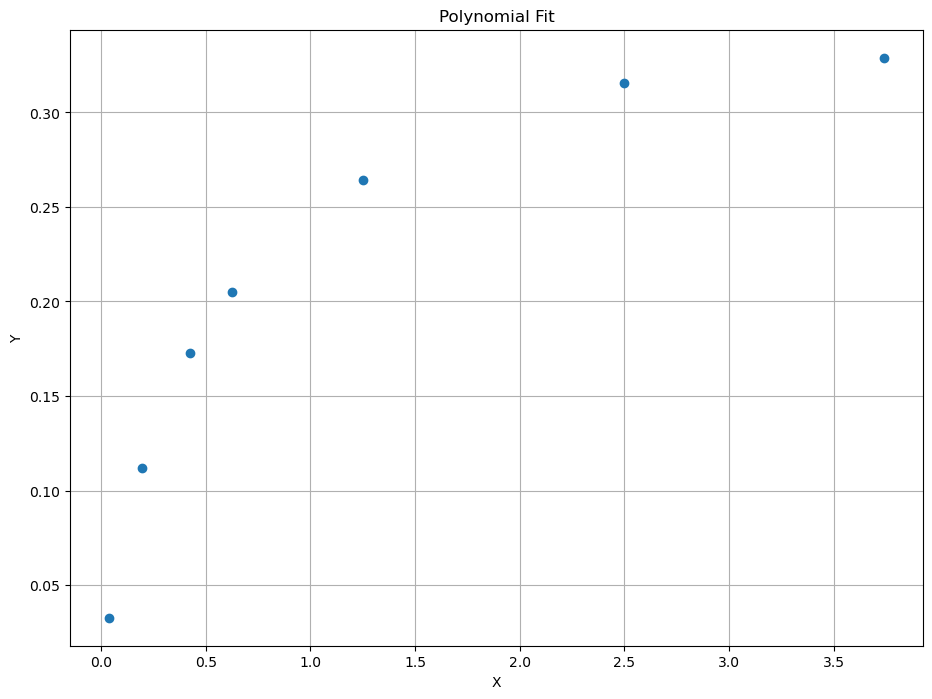

In [6]:
random.seed(1)

for i in range(0,n):
    r = random.gauss(0.0,0.005)
    y.append(fitfunction(x[i],par_actual)+r)

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array(x)
y = np.array(y)

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Polynomial Fit")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.plot(x,y,'o')

In [7]:
m = beta_order

Jacobian = np.zeros(shape = (n,m))
JacobianT = np.zeros(shape = (m,n))
JTdy = np.zeros(shape = (m,1))
JTJ = np.zeros(shape = (m,m))
JTJInv = np.zeros(shape = (m,m))
residuals = np.zeros(shape = (n,1))
betas = np.zeros(shape = (m,1))
Delta = np.zeros(shape = (m,1))

In [8]:
betas[0][0] = 0.30
betas[1][0] = 0.75

parameter_matrix = array('d')
parameter_matrix_dbeta = array('d')
parameter_matrix.append(betas[0][0])
parameter_matrix.append(betas[1][0])

dbetamax = 10000
dbeta = 0
epsilon = 0.0000001
epsilon_beta = 0.01

In [9]:
while (dbetamax > epsilon):
    for i in range(0,n):
        function_value = fitfunction(x[i],parameter_matrix)
        residuals[i][0]=y[i]-function_value
        for j in range(0,m):
            if (j==0):
                jacobian = jacobian_beta1(x[i],parameter_matrix)
            else:
                jacobian = jacobian_beta2(x[i],parameter_matrix)
            Jacobian[i][j]=jacobian
            #print(i,j,Jacobian[i][j])
            
    JacobianT = Jacobian.transpose()
    JTdy = np.array(np.matrix(JacobianT)*np.matrix(residuals))
    JTJ = np.array(np.matrix(JacobianT)*np.matrix(Jacobian))
    JTJInv = np.array(np.linalg.inv(JTJ))
    Delta = np.array(np.matrix(JTJInv)*np.matrix(JTdy))

    dbetamax = 0.0
    
    for j in range(0,m):
        parameter_matrix[j]=parameter_matrix[j]-Delta[j][0]
        dbeta = math.fabs(Delta[j][0]/parameter_matrix[j])
        if (dbeta > dbetamax): 
            dbetamax = dbeta
        print ("dbetamax = %f" % dbetamax )

dbetamax = 0.176813
dbetamax = 1.442770
dbetamax = 0.001228
dbetamax = 0.292150
dbetamax = 0.015509
dbetamax = 0.094310
dbetamax = 0.001759
dbetamax = 0.008773
dbetamax = 0.000081
dbetamax = 0.000333
dbetamax = 0.000003
dbetamax = 0.000011
dbetamax = 0.000000
dbetamax = 0.000000
dbetamax = 0.000000
dbetamax = 0.000000


In [10]:
print(Jacobian)
print(Jacobian[6][1])
print(" ")

print(JacobianT)
print(JacobianT[1][6])
print(" ")

print(JTdy)
print(JTdy[0][0])
print(" ")

print(JTJ)
print(JTJ[0][0])
print(" ")

print(JTJInv)
print(JTJInv[0][0])
print(" ")


[[-0.07289204  0.05191848]
 [-0.28642341  0.15702207]
 [-0.46789733  0.19127473]
 [-0.56431021  0.18888909]
 [-0.72164162  0.15432542]
 [-0.83799287  0.10430041]
 [-0.88555945  0.07785907]]
0.07785907388859169
 
[[-0.07289204 -0.28642341 -0.46789733 -0.56431021 -0.72164162 -0.83799287
  -0.88555945]
 [ 0.05191848  0.15702207  0.19127473  0.18888909  0.15432542  0.10430041
   0.07785907]]
0.07785907388859169
 
[[ 3.52441600e-15]
 [-2.41012727e-10]]
3.5244160020986293e-15
 
[[ 2.63193976 -0.5125677 ]
 [-0.5125677   0.14037351]]
2.6319397591060105
 
[[ 1.3152333   4.80251648]
 [ 4.80251648 24.66002848]]
1.315233303537492
 


In [11]:
error_sum = 0
yfit = 0
error = array('d')

for i in range(0,n):
    yfit = fitfunction(x[i],parameter_matrix)
    print ("i x y fit = %d %f %f %f " % (j,x[i],y[i],yfit))
    error_sum = error_sum + (yfit-y[i])*(yfit-y[i])
    yfit = 0
    
chi2 = error_sum/(n-m)
print ("chi2/dof = %f / %f" % (error_sum,(n-m)))

for k in range(0,m):
        error.append(math.sqrt(chi2*JTJInv[k][k]))
        print(" beta[%d] = %f +/- %f" % ((k+1),parameter_matrix[k],error[k]))


i x y fit = 1 0.038000 0.032718 0.027066 
i x y fit = 1 0.194000 0.111717 0.106354 
i x y fit = 1 0.425000 0.172720 0.173738 
i x y fit = 1 0.626000 0.205211 0.209538 
i x y fit = 1 1.253000 0.264231 0.267958 
i x y fit = 1 2.500000 0.315407 0.311161 
i x y fit = 1 3.740000 0.328939 0.328824 
chi2/dof = 0.000112 / 5.000000
 beta[1] = 0.371317 +/- 0.005437
 beta[2] = 0.483319 +/- 0.023544


[0.37131744 0.48331875] [[2.95647156e-05 1.07953629e-04]
 [1.07953629e-04 5.54319829e-04]]
Coefficients (from curve_fit)
[0.37131744 0.48331875]
Covariance Matrix (from curve_fit)
[[2.95647156e-05 1.07953629e-04]
 [1.07953629e-04 5.54319829e-04]]
Chi^2 / dof = 1.124E-04 / 5
Fit Parameter 0: 3.713E-01 +/- 5.437E-03
0 1 8.433E-01
Fit Parameter 1: 4.833E-01 +/- 2.354E-02


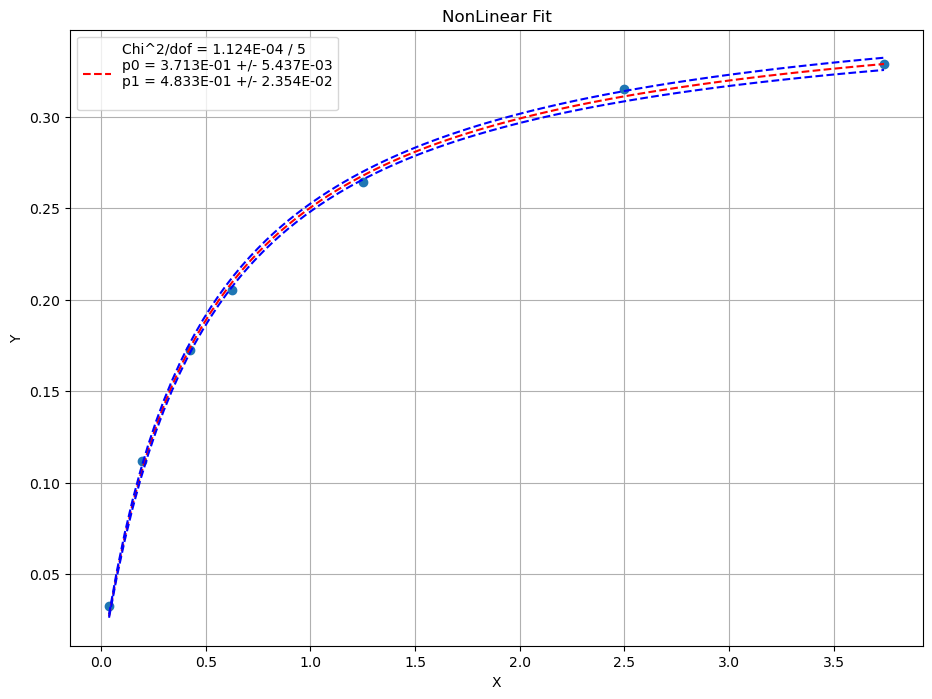

In [12]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("NonLinear Fit")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.plot(x,y,'o')

init_vals = [0.3, 0.75]
popt, pcov = curve_fit(fitfunction_python,x,y,p0=init_vals)

print (popt,pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction_python(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fitfunction_python(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(n-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction_python(xi, *popt), 'r--', label = mylabel % tuple(param))
ax1.plot(xi,lower,'b--')
ax1.plot(xi,upper,'b--')

leg = ax1.legend()
plt.show()

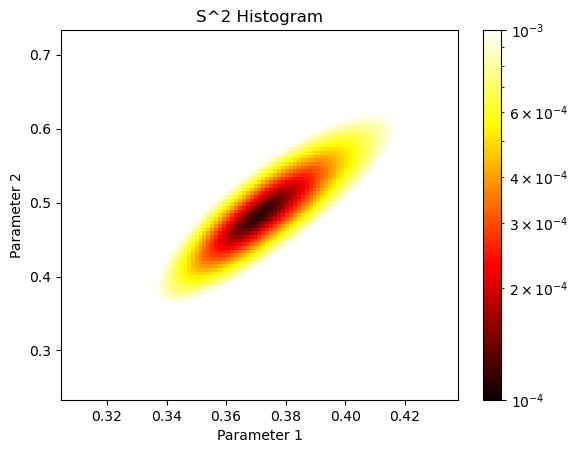

In [13]:
from matplotlib.colors import LogNorm

nbins = 101
xwidth = 0.2000
ywidth = 0.5000
xlow = parameter_matrix[0] - xwidth / 3.0
xhigh = parameter_matrix[0] + xwidth / 3.0
ylow = parameter_matrix[1] - ywidth / 2.0
yhigh = parameter_matrix[1] + ywidth / 2.0

b1 = np.linspace(xlow, xhigh, nbins)
b2 = np.linspace(ylow, yhigh, nbins)
sums = np.zeros((nbins, nbins))

for j in range(nbins):
    for k in range(nbins):
        pars = [b1[j], b2[k]]
        total_sum = 0.0
        for i in range(n):
            yfit = fitfunction(x[i], pars)
            total_sum += (yfit - y[i]) ** 2
        sums[j][k] = total_sum

fig, ax = plt.subplots()

# Create a meshgrid of b1 and b2
B1, B2 = np.meshgrid(b1, b2)

# Plot the sums as a color map
im = ax.imshow(sums, norm=LogNorm(vmin=1E-4,vmax=1E-3),extent=[xlow, xhigh, ylow, yhigh], origin='lower', aspect='auto', cmap='hot')

# Set labels and title
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_title('S^2 Histogram')

# Add a colorbar
cbar = fig.colorbar(im)

plt.show()
